In [1]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import cross_val_score, cross_validate

from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.ensemble import VotingClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz,export_text, plot_tree
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.svm import SVC

from sklearn import metrics
import graphviz

import math
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter('ignore')

In [2]:
df = pd.read_csv('../data/UniversalBank.csv')
df.head(3)

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0


In [3]:
df = df.drop(['ID','ZIPCode'], axis=1)
df.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1


In [4]:
# 특성데이터와 라벨 데이터 구분
x_data = df.drop(['CreditCard'], axis=1)
y_data = df['CreditCard']

In [5]:
df.shape,x_data.shape,y_data.shape

((5000, 12), (5000, 11), (5000,))

In [6]:
# 학습, 테스트 데이터셋
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, 
        test_size=0.2, stratify=y_data)

## 1. 나브베이즈, SVM 을 이용하시요.
최적파라미터찾기,  검정하기(f1 score, ROC)

### 나브베이즈
- 이진분류 BernoulliNB()

In [7]:
### 모델 적용
estimators = [('scaler',StandardScaler()),
              ('Ber',BernoulliNB())]

pipe = Pipeline(estimators)              

param = {'Ber__alpha':[i for i in range(1,10,10)]}

gridBer = GridSearchCV(pipe, param_grid=param, verbose=1,scoring ='f1')
gridBer.fit(x_train, y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('Ber',
                                        BernoulliNB(alpha=1.0, binarize=0.0,
                                                    class_prior=None,
                                                    fit_prior=True))],
                                verbose=False),
             iid='deprecated', n_jobs=None, param_grid={'Ber__alpha': [1]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='f1', verbose=1)

In [8]:
### 최적 파라미터
print('최적 파라미터:',gridBer.best_params_['Ber__alpha'])

### 스코어
print('f1_score:',gridBer.best_estimator_.score(x_test, y_test))

최적 파라미터: 1
f1_score: 0.738


In [11]:
### 예측
i = 0
gridBer.best_estimator_.predict([x_test.iloc[i]]), y_test.iloc[i]

(array([0]), 1)

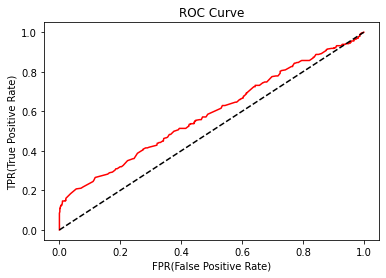

In [12]:
### ROC
proba = gridBer.best_estimator_.predict_proba(x_test)
fpr, tpr, thresholds = metrics.roc_curve( y_test,proba[:,1]) 

plt.plot( fpr, tpr , 'r-')
plt.plot( [0,1],[0,1], 'k--' ) 

plt.title('ROC Curve')
plt.xlabel('FPR(False Positive Rate)')
plt.ylabel('TPR(True Positive Rate)')


plt.show()

### SVM



In [13]:
estimators = [('scaler',StandardScaler()),
              ('svc',SVC(probability=True))] # 확률을 활성화

pipe = Pipeline(estimators)              

param = {'svc__kernel':['linear', 'poly', 'rbf', 'sigmoid', 'precomputed'],
         'svc__C':[i for i in range(1,10,10)],
         'svc__gamma':['scale', 'auto']}

gridSvc = GridSearchCV(pipe, param_grid=param, verbose=1)
gridSvc.fit(x_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  1.1min finished


GridSearchCV(cv=None, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('svc',
                                        SVC(C=1.0, break_ties=False,
                                            cache_size=200, class_weight=None,
                                            coef0=0.0,
                                            decision_function_shape='ovr',
                                            degree=3, gamma='scale',
                                            kernel='rbf', max_iter=-1,
                                            probability=True, random_state=None,
                                            shrinking=True, tol=0.001,
                                        

In [14]:
### 최적 파라미터
print('최적 파라미터:',gridSvc.best_params_)

### 스코어
print('f1_score:',gridSvc.best_estimator_.score(x_test, y_test))

최적 파라미터: {'svc__C': 1, 'svc__gamma': 'scale', 'svc__kernel': 'rbf'}
f1_score: 0.741


In [15]:
### 예측
i = 100
gridSvc.best_estimator_.predict([x_test.iloc[i]]), y_test.iloc[i]

(array([0]), 0)

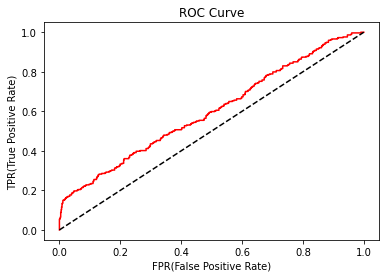

In [16]:
### ROC
proba = gridSvc.best_estimator_.predict_proba(x_test)
fpr, tpr, thresholds = metrics.roc_curve( y_test,proba[:,1]) 

plt.plot( fpr, tpr , 'r-')
plt.plot( [0,1],[0,1], 'k--' ) 

plt.title('ROC Curve')
plt.xlabel('FPR(False Positive Rate)')
plt.ylabel('TPR(True Positive Rate)')


plt.show()

## 2. 위 2개 모델을 voting으로  구하시요
검정하기(f1 score, ROC)

In [17]:
model_vote = VotingClassifier(estimators=[('Ber',gridBer.best_estimator_), 
                                          ('svc', gridSvc.best_estimator_)], voting='soft')
model_vote.fit(x_train, y_train)

VotingClassifier(estimators=[('Ber',
                              Pipeline(memory=None,
                                       steps=[('scaler',
                                               StandardScaler(copy=True,
                                                              with_mean=True,
                                                              with_std=True)),
                                              ('Ber',
                                               BernoulliNB(alpha=1,
                                                           binarize=0.0,
                                                           class_prior=None,
                                                           fit_prior=True))],
                                       verbose=False)),
                             ('svc',
                              Pipeline(memory=None,
                                       steps=[('scaler',
                                               StandardScaler(copy=True,

In [18]:
y_pred = model_vote.predict(x_test)

In [19]:
print(f'정확도     : {model_vote.score(x_test, y_test)}')
print(f'f1_score : {metrics.f1_score(y_test, y_pred)}')

정확도     : 0.738
f1_score : 0.2598870056497175


In [20]:
### 예측
i = 100
model_vote.predict([x_test.iloc[i]]), y_test.iloc[i]

(array([0]), 0)

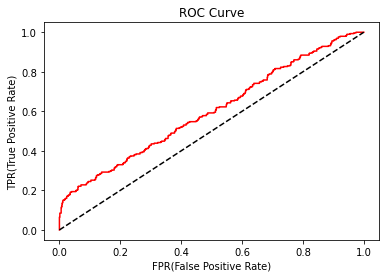

In [21]:
### ROC
proba = model_vote.predict_proba(x_test)
fpr, tpr, thresholds = metrics.roc_curve( y_test,proba[:,1]) 

plt.plot( fpr, tpr , 'r-')
plt.plot( [0,1],[0,1], 'k--' ) 

plt.title('ROC Curve')
plt.xlabel('FPR(False Positive Rate)')
plt.ylabel('TPR(True Positive Rate)')


plt.show()

## 3. 군집분류(2개의 특성데이터를) 하시요
( 다중공선성 높은 컬럼 제거후)

### 히트맵으로 상관관계 확인

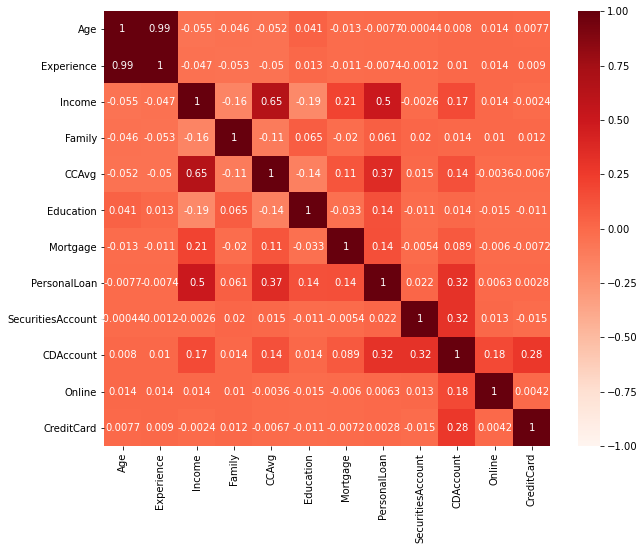

In [22]:
plt.figure(figsize=(10,8))
sns.heatmap( df.corr(), annot=True, cmap='Reds', vmin=-1, vmax=1) 
plt.show()

### 다중공선성 확인


In [23]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [24]:
vif = pd.DataFrame()

vif["VIF Factor"] =  [variance_inflation_factor(x_data.values, i) 
                        for i in range(x_data.shape[1])]
vif['features'] = x_data.columns
vif

,VIF Factor,features
0,82.884589,Age
1,31.327333,Experience
2,7.755468,Income
3,5.647995,Family
4,3.868418,CCAvg
5,7.118232,Education
6,1.375562,Mortgage
7,1.784849,PersonalLoan
8,1.256417,SecuritiesAccount
9,1.379720,CDAccount


In [25]:
# Age 컬럼제거
x_data1 = x_data.drop(['Age'], axis=1)
x_data1.head()

,Experience,Income,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online
0,1,49,4,1.6,1,0,0,1,0,0
1,19,34,3,1.5,1,0,0,1,0,0
2,15,11,1,1.0,1,0,0,0,0,0
3,9,100,1,2.7,2,0,0,0,0,0
4,8,45,4,1.0,2,0,0,0,0,0


In [26]:
# 학습, 테스트 데이터셋
x_train, x_test, y_train, y_test = train_test_split(x_data1, y_data, 
        test_size=0.2, stratify=y_data)

In [27]:
vif = pd.DataFrame()

vif["VIF Factor"] =  [variance_inflation_factor(x_data1.values, i) 
                        for i in range(x_data1.shape[1])]
vif['features'] = x_data1.columns
vif

,VIF Factor,features
0,3.422252,Experience
1,6.188612,Income
2,4.053253,Family
3,3.838752,CCAvg
4,4.395651,Education
5,1.370714,Mortgage
6,1.577885,PersonalLoan
7,1.248053,SecuritiesAccount
8,1.377800,CDAccount
9,2.427523,Online


### 군집분류 나누기

In [28]:
from sklearn.cluster import KMeans

In [29]:
estimators = [('scaler',StandardScaler()),
              ('Kmeans',KMeans(n_clusters=2))] # 확률을 활성화

pipe = Pipeline(estimators) 
pipe.fit(x_train)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('Kmeans',
                 KMeans(algorithm='auto', copy_x=True, init='k-means++',
                        max_iter=300, n_clusters=2, n_init=10, n_jobs=None,
                        precompute_distances='auto', random_state=None,
                        tol=0.0001, verbose=0))],
         verbose=False)

In [30]:
pipe.predict(x_test)[30:40]

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 0], dtype=int32)

In [31]:
y_test[30:40]

2037    1
4170    1
4703    0
2237    1
3934    1
3183    0
935     1
4100    0
2220    0
1339    0
Name: CreditCard, dtype: int64

## 4. 차원축소후 학습하고 
test data 0번째 데이터에 대한 분류 예측값을 구하시요.

In [42]:
scaleX = StandardScaler()
x_trainS = scaleX.fit_transform(x_train)
x_testS  = scaleX.fit_transform(x_test)

In [43]:
from sklearn.decomposition import PCA

In [44]:
### 모델 적용
estimators = [('scaler',StandardScaler()),
              ('PCA',PCA(n_components=2)),  
              ('Ber',BernoulliNB())]

pipe = Pipeline(estimators)              

param = {'Ber__alpha':[i for i in range(1,10,10)],
        'PCA__n_components':[2]}

gridBer = GridSearchCV(pipe, param_grid=param, verbose=1)
gridBer.fit(x_train, y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('PCA',
                                        PCA(copy=True, iterated_power='auto',
                                            n_components=2, random_state=None,
                                            svd_solver='auto', tol=0.0,
                                            whiten=False)),
                                       ('Ber',
                                        BernoulliNB(alpha=1.0, binarize=0.0,
                                                    class_prior=None,
                                                    fit_prior=True))],
                                verbose=False),
        

In [45]:
gridBer.best_params_

{'Ber__alpha': 1, 'PCA__n_components': 2}

In [50]:
x_testS[[0]]

array([[-1.74582631, -0.65262386,  1.40969847, -0.18925741, -1.00972754,
         1.27440565, -0.33702484, -0.33702484, -0.25264558,  0.82331789]])

In [51]:
# test data 첫번째값 예측
gridBer.best_estimator_.predict(x_testS[[0]])

array([0])